# Machine Learning Assignment 1 

In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns 

%matplotlib inline


In [2]:
df = pd.read_csv("turtle-2.csv")

In [3]:
print(df.columns) # seeing the columns to understand the data set more in depth before the analysis

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')


# A1.1 

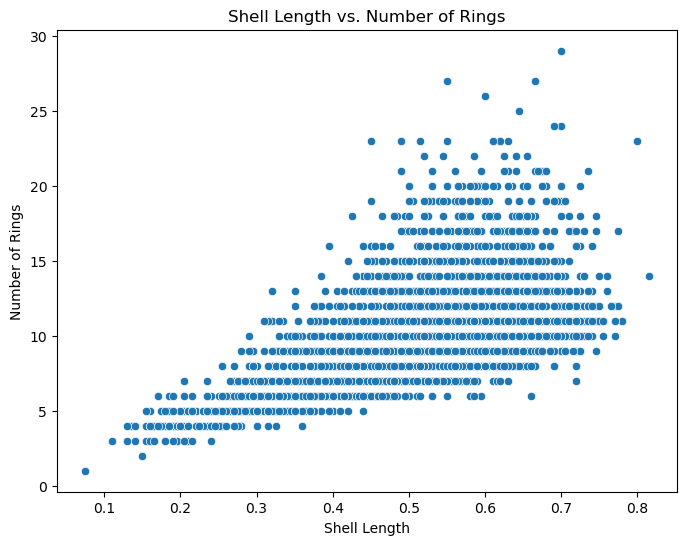

In [4]:
X = df[['Length']]  
y = df['Rings']  
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Length'], y=df['Rings'])
plt.xlabel("Shell Length")
plt.ylabel("Number of Rings")
plt.title("Shell Length vs. Number of Rings")
plt.show()


# A1.2

In [5]:
print( df.describe()) 

            Length     Diameter       Height  Whole weight  Shucked weight  \
count  4177.000000  4177.000000  4177.000000   4177.000000     4177.000000   
mean      0.523992     0.407881     0.139516      0.828742        0.359367   
std       0.120093     0.099240     0.041827      0.490389        0.221963   
min       0.075000     0.055000     0.000000      0.002000        0.001000   
25%       0.450000     0.350000     0.115000      0.441500        0.186000   
50%       0.545000     0.425000     0.140000      0.799500        0.336000   
75%       0.615000     0.480000     0.165000      1.153000        0.502000   
max       0.815000     0.650000     1.130000      2.825500        1.488000   

       Viscera weight  Shell weight        Rings  
count     4177.000000   4177.000000  4177.000000  
mean         0.180594      0.238831     9.933684  
std          0.109614      0.139203     3.224169  
min          0.000500      0.001500     1.000000  
25%          0.093500      0.130000     8.

/var/folders/sp/bbr13rw5121bs8lpg6c9tzl40000gn/T/ipykernel_1435/2797372104.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmatrix = df.corr()


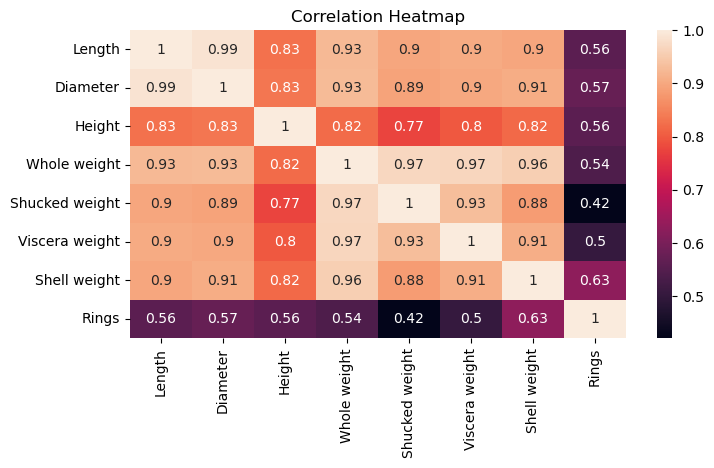

The most correlated feature with Rings is Shell weight


In [6]:
corrmatrix = df.corr()
plt.figure(figsize=(8, 4))
sns.heatmap(corrmatrix, annot=True)
plt.title("Correlation Heatmap")
plt.show()
mostcorr = corrmatrix['Rings'].drop('Rings').idxmax()


print("The most correlated feature with Rings is",  mostcorr)

# A1.3

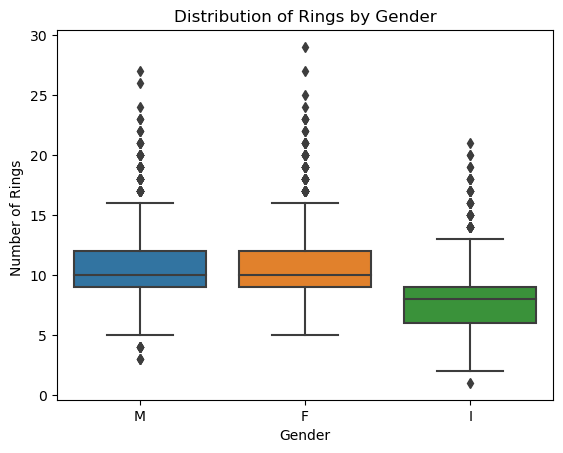

In [7]:
sns.boxplot(x=df['Sex'], y=df['Rings'])  
plt.xlabel("Gender")
plt.ylabel("Number of Rings ")
plt.title("Distribution of Rings by Gender")

plt.show()

In [8]:
# Based on the box plot, gender does not appear to have a strong influence on the number of rings (age) in turtles.

# The median for both Males (M) and Females (F) is almost identical, meaning their average ages are similar.
# The IQR is also similar for both genders, suggesting no significant difference in age distribution.
# The Infant (I) category has a slightly lower median and a smaller range, which is normal since younger turtles would naturally have fewer rings.
# Although there are some outliers visible, that does not seem to be gender-dependent.

# A.2.1


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import KBinsDiscretizer

df = pd.read_csv("turtle-2.csv")
X = df.drop(columns=['Rings'])
y = df['Rings']

num_bins = 5  
kbins = KBinsDiscretizer(n_bins=num_bins, encode='ordinal', strategy='quantile')
y_binned = kbins.fit_transform(y.values.reshape(-1, 1)).astype(int).flatten()

xtrain, xtemp, ytrain, ytemp, ytrain_binned, ytemp_binned = train_test_split(
    X, y, y_binned, test_size=0.2, random_state=42, stratify=y_binned
)
xval, xtest, yval, ytest, yval_binned, ytest_binned = train_test_split(
    xtemp, ytemp, ytemp_binned, test_size=0.5, random_state=42, stratify=ytemp_binned
)
def bin_proportions(y_binned):
    unique_bins, bin_counts = np.unique(y_binned, return_counts=True)
    proportions = bin_counts / bin_counts.sum()  
    return dict(zip(unique_bins, proportions))

print("Train Bin Proportions:", bin_proportions(ytrain_binned))
print("Validation Bin Proportions:", bin_proportions(yval_binned))
print("Test Bin Proportions:", bin_proportions(ytest_binned))

Train Bin Proportions: {0: 0.10715354684226279, 1: 0.22957198443579765, 2: 0.16492068243041005, 3: 0.26848249027237353, 4: 0.22987129601915593}
Validation Bin Proportions: {0: 0.1076555023923445, 1: 0.22966507177033493, 2: 0.16507177033492823, 3: 0.2679425837320574, 4: 0.22966507177033493}
Test Bin Proportions: {0: 0.1076555023923445, 1: 0.22966507177033493, 2: 0.16507177033492823, 3: 0.2679425837320574, 4: 0.22966507177033493}


In [10]:
x = df.drop(columns=['Rings'])
y = df['Rings']

xtrain, xtemp, ytrain, ytemp = train_test_split(x, y, test_size=0.2, random_state=42)
xval, xtest, yval, ytest = train_test_split(xtemp, ytemp, test_size=0.5, random_state=42)

print("Train set size:", len(ytrain))
print("Validation set size:", len(yval))
print("Test set size:", len(ytest))

Train set size: 3341
Validation set size: 418
Test set size: 418


# A.2.2

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

X = df.drop(columns=['Rings'])  
y = df['Rings']

X = pd.get_dummies(X, drop_first=True)

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred = linear_reg.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("R² Score:", round(r2,3))
print("MSE:",  round(mse,3))
print("MAE:", round(mse, 3))


R² Score: 0.585
MSE: 5.051
MAE: 5.051


# A2.3

Best Polynomial Degree: 2
Polynomial Regression Results:
R² Score: 0.5995
MSE: 4.8761
MAE: 1.5426


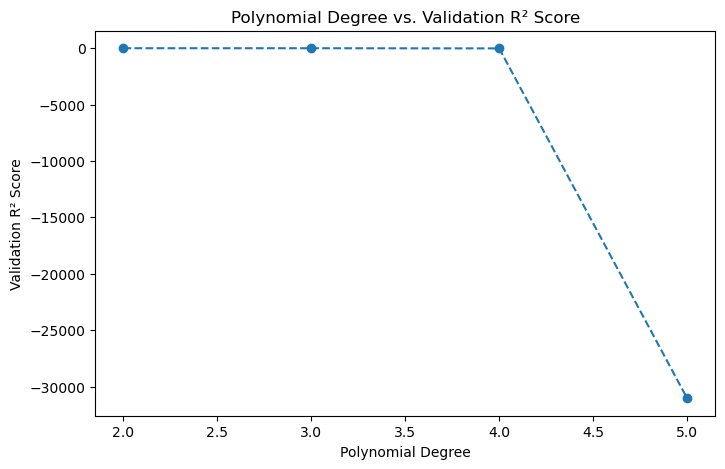

In [12]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

best_degree = None
best_r2 = -np.inf
performance = {}

for degree in range(2, 6):
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train, y_train)
    
    y_val_pred = model.predict(X_val)
    r2_val = r2_score(y_val, y_val_pred)
    performance[degree] = r2_val
    
    if r2_val > best_r2:
        best_r2 = r2_val
        best_degree = degree

best_model = make_pipeline(PolynomialFeatures(best_degree), LinearRegression())
best_model.fit(X_train, y_train)

y_test_pred = best_model.predict(X_test)

r2_test = r2_score(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

print(f"Best Polynomial Degree: {best_degree}")
print("Polynomial Regression Results:")
print(f"R² Score: {r2_test:.4f}")
print(f"MSE: {mse_test:.4f}")
print(f"MAE: {mae_test:.4f}")


#PLOT 

plt.figure(figsize=(8, 5))
plt.plot(performance.keys(), performance.values(), marker='o', linestyle='dashed')
plt.xlabel("Polynomial Degree")
plt.ylabel("Validation R² Score")
plt.title("Polynomial Degree vs. Validation R² Score")
plt.show()


# A2.4

In [13]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split


df = pd.read_csv("turtle-2.csv")

df = pd.get_dummies(df, columns=['Sex'], drop_first=True)

X = df.drop(columns=['Rings'])  
y = df['Rings']  

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

k_values = [1, 3, 6, 10]
best_k, best_score = None, -float("inf")

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    score = r2_score(y_val, knn.predict(X_val))  # Evaluate on validation set

    if score > best_score:
        best_k, best_score = k, score

best_knn = KNeighborsRegressor(n_neighbors=best_k)
best_knn.fit(X_train, y_train)

y_pred = best_knn.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Best KNN (k=", best_k,")")
print("R² Score:",round(r2,3) )
print("MSE:", round(mse,3))
print("MAE:", round(mae,3))


Best KNN (k= 10 )
R² Score: 0.545
MSE: 5.545
MAE: 1.6


# A2.5

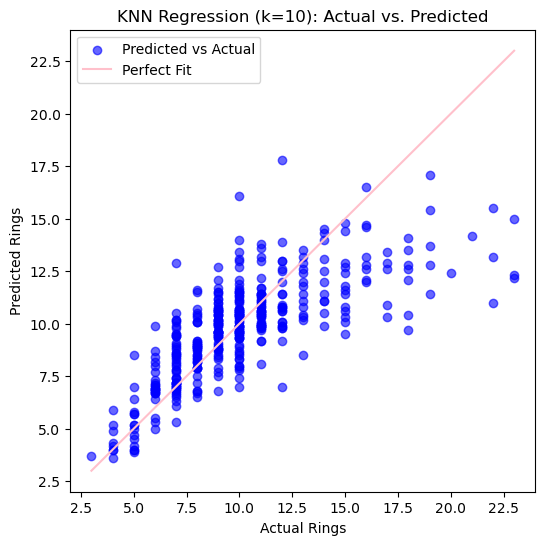

In [14]:

plt.figure(figsize=(6, 6))
plt.scatter(ytest, y_pred, color="blue", alpha=0.6, label="Predicted vs Actual")

minval = min(ytest.min(), y_pred.min())
maxval = max(ytest.max(), y_pred.max())
plt.plot([minval, maxval], [minval, maxval], color="pink", label="Perfect Fit")

plt.xlabel("Actual Rings")
plt.ylabel("Predicted Rings")
plt.title(f"KNN Regression (k={best_k}): Actual vs. Predicted")
plt.legend()

plt.show()


# B1 
Perform a 10-fold cross-validation for the best model (chosen from A.2)

# B1.1

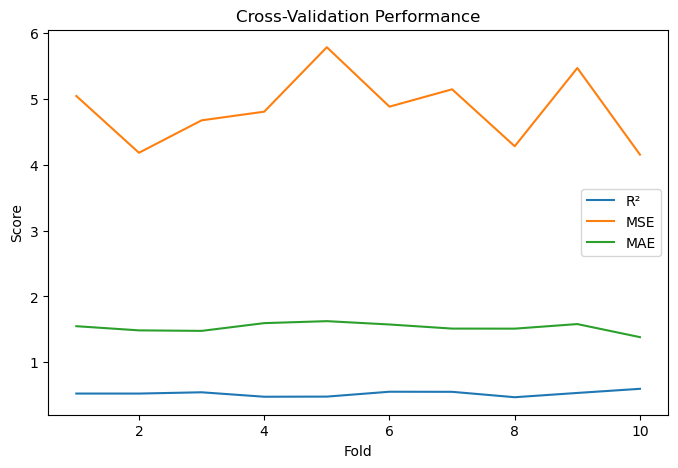

In [17]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold


if 'Sex' in xtrain.columns:
    label_encoder = LabelEncoder()
    xtrain['Sex'] = label_encoder.fit_transform(xtrain['Sex'])
    xval['Sex'] = label_encoder.transform(xval['Sex'])
    xtest['Sex'] = label_encoder.transform(xtest['Sex'])

best_knn = KNeighborsRegressor(n_neighbors=best_k)

kf = KFold(n_splits=10, shuffle=True, random_state=42)

r2_scores, mse_scores, mae_scores = [], [], []

for train_idx, val_idx in kf.split(xtrain):
    x_fold_train, x_fold_val = xtrain.iloc[train_idx], xtrain.iloc[val_idx]
    y_fold_train, y_fold_val = ytrain.iloc[train_idx], ytrain.iloc[val_idx]

    best_knn.fit(x_fold_train, y_fold_train)
    y_fold_pred = best_knn.predict(x_fold_val)

    r2_scores.append(r2_score(y_fold_val, y_fold_pred))
    mse_scores.append(mean_squared_error(y_fold_val, y_fold_pred))
    mae_scores.append(mean_absolute_error(y_fold_val, y_fold_pred))

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), r2_scores,label="R²")
plt.plot(range(1, 11), mse_scores,label="MSE")
plt.plot(range(1, 11), mae_scores, label="MAE")
plt.xlabel("Fold")
plt.ylabel("Score")
plt.legend()
plt.title("Cross-Validation Performance")
plt.show()


# B1.2

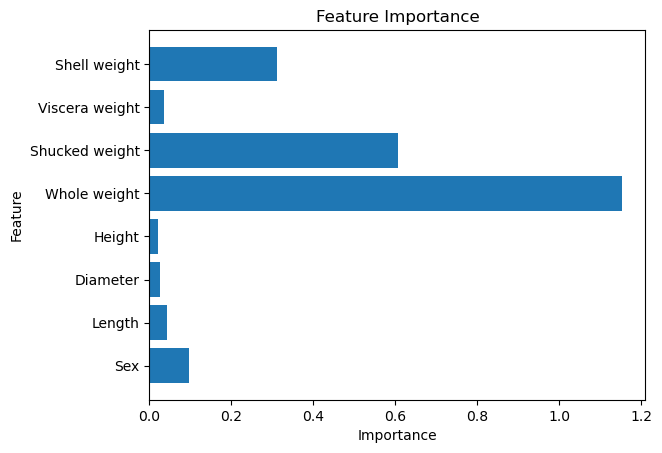

In [18]:
from sklearn.inspection import permutation_importance

train_idx, val_idx = list(kf.split(xtrain))[np.argmin(mse_scores)]
best_knn.fit(xtrain.iloc[train_idx], ytrain.iloc[train_idx])

importance = permutation_importance(best_knn, xtrain.iloc[val_idx], ytrain.iloc[val_idx], random_state=42)
plt.barh(xtrain.columns, importance.importances_mean)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance")
plt.show()


# B2.1

In [19]:
worstfold = np.argmax(mse_scores)

print("Worst-Performing Fold: Fold:", worstfold, "with MSE = ", round( mse_scores[worstfold],3))

Worst-Performing Fold: Fold: 4 with MSE =  5.782


# B2.2

<Figure size 800x500 with 0 Axes>

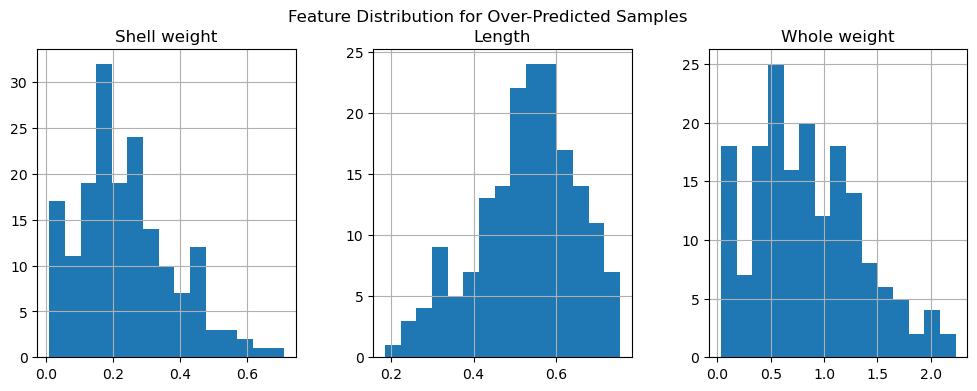

In [22]:
worstxval = xtrain.iloc[val_idx] 
worstyval = ytrain.iloc[val_idx]
worstypred = best_knn.predict(worstxval)
overpredicted = worstxval[worstypred > worstyval]

plt.figure(figsize=(8, 5))
overpredicted[['Shell weight', 'Length', 'Whole weight']].hist(bins=15, layout=(1, 3), figsize=(12, 4))
plt.suptitle("Feature Distribution for Over-Predicted Samples")
plt.show()

# B2.3

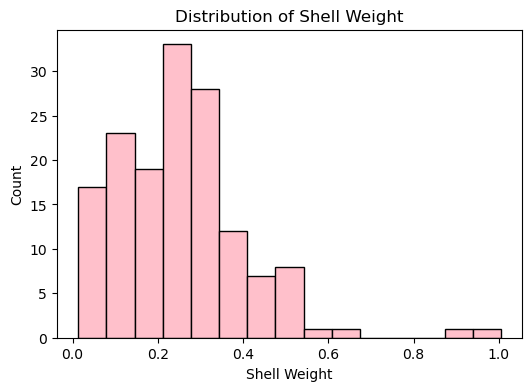

In [23]:
underpredicted = worstxval[worstypred < worstyval]
error_magnitude = (worstyval - worstypred)[worstypred < worstyval] 

plt.figure(figsize=(6, 4))
plt.hist(underpredicted["Shell weight"], bins=15, color="pink", edgecolor="black")
plt.xlabel("Shell Weight")
plt.ylabel("Count")
plt.title("Distribution of Shell Weight")
plt.show()

# B3.1

In [24]:
import pandas as pd

results = pd.DataFrame([
    ["Linear Regression", "None", round(r2, 3), round(mse, 3), round(mae, 3)],
    [f"KNN (k={best_k})", f"k={best_k}", round(r2, 3), round(mse, 3), round(mae, 3)]
], columns=["Model", "Hyperparameters", "R²", "MSE", "MAE"])

print(results)


               Model Hyperparameters     R²    MSE  MAE
0  Linear Regression            None  0.545  5.545  1.6
1         KNN (k=10)            k=10  0.545  5.545  1.6


# B3.2

In [25]:
results.to_csv("model_results.csv")